In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', '{:.1f}'.format)
plt.style.use('fivethirtyeight')

# Load the dataset
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.0,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count 299.0    299.0                     299.0     299.0              299.0   
mean   60.8      0.4                     581.8       0.4               38.1   
std    11.9      0.5                     970.3       0.5               11.8   
min    40.0      0.0                      23.0       0.0               14.0   
25%    51.0      0.0                     116.5       0.0               30.0   
50%    60.0      0.0                     250.0       0.0               38.0   
75%    70.0      1.0                     582

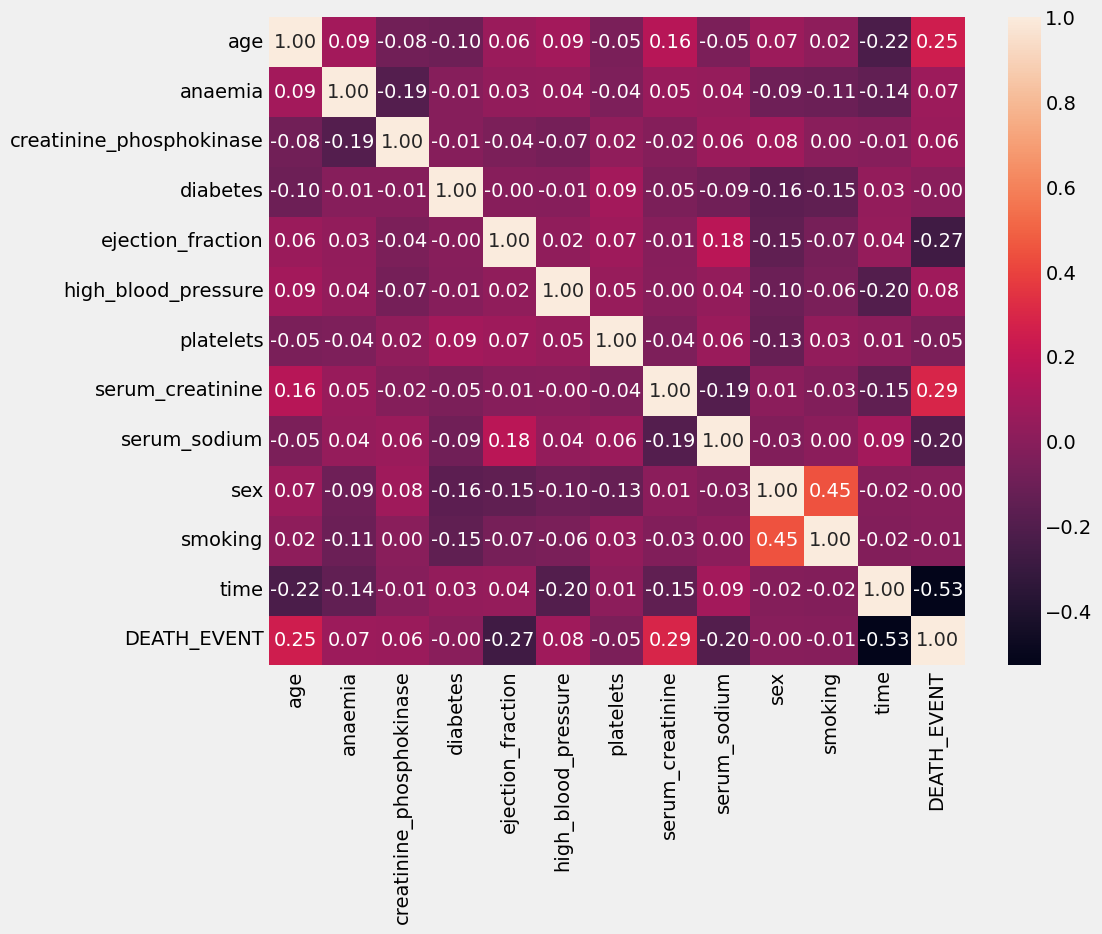

In [4]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()


In [5]:
# Define features and target
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# List of classifiers to use
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'XGBoost': xgb.XGBClassifier()
}

# Function to train and evaluate models
def train_and_evaluate(classifiers, X_train, y_train, X_test, y_test):
    results = {}
    for name, clf in classifiers.items():
        model = make_pipeline(StandardScaler(), clf)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy: {accuracy:.2f}')
        print(classification_report(y_test, y_pred))
        results[name] = accuracy
    return results

# Train and evaluate all classifiers
results = train_and_evaluate(classifiers, X_train, y_train, X_test, y_test)


Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Decision Tree Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.83      0.73        35
           1       0.60      0.36      0.45        25

    accuracy                           0.63        60
   macro avg       0.62      0.59      0.59        60
weighted avg       0.63      0.63      0.61        60

Random Forest Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        35
           1       0.73      0.44      0.55        25

    accuracy                           0.70        60
   macro avg       0.71      0.66  

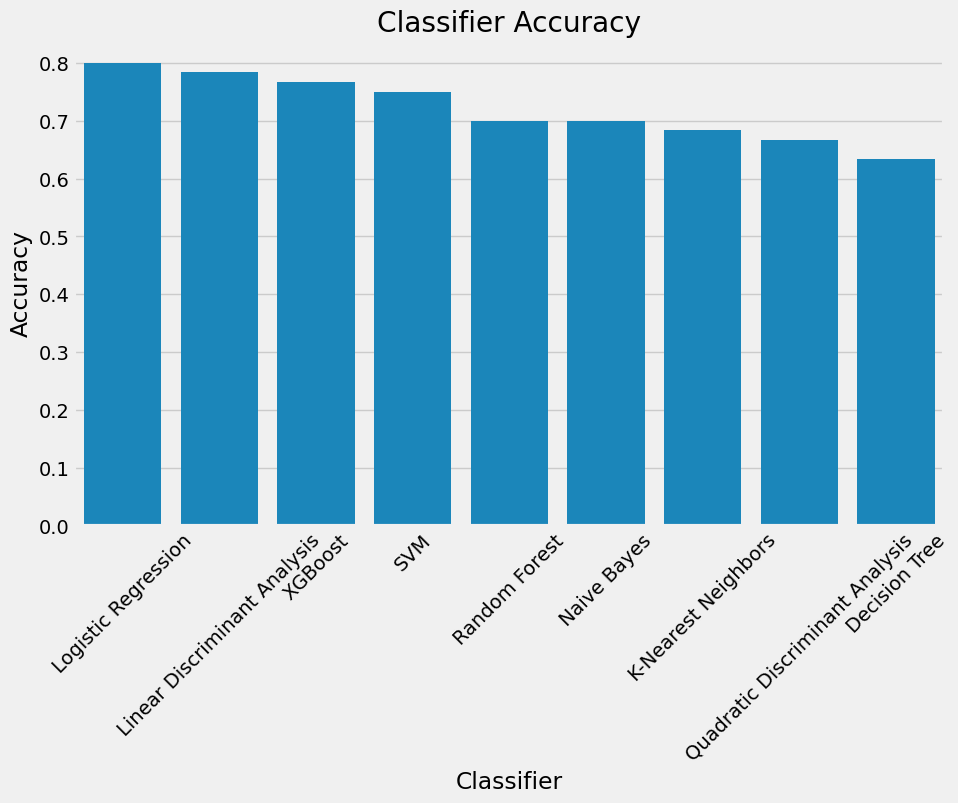

In [7]:
# Plot the accuracy of each classifier
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.show()


In [8]:
import pickle

# Assuming RandomForestClassifier had the best performance
best_model = make_pipeline(StandardScaler(), RandomForestClassifier())
best_model.fit(X_train, y_train)

# Save the trained model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully!")


Model saved successfully!


In [11]:
# Load the saved model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example prediction
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print(f'Predicted class: {prediction[0]}')


Predicted class: 0


The bar chart shows that Logistic Regression has the highest accuracy among the classifiers, approaching 0.8, followed closely by Linear Discriminant Analysis, XGBoost, SVM, and Random Forest, which all exhibit high accuracy scores near each other. Naive Bayes, K-Nearest Neighbors, and Quadratic Discriminant Analysis follow with slightly lower accuracies, while the Decision Tree has the lowest accuracy among the classifiers. This suggests that Logistic Regression and similar models perform best on the given dataset, while the Decision Tree is the least effective. Overall, most classifiers demonstrate comparable performance, indicating robust predictive capabilities across different methods.